In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=100)
#cb.fit(X, y, cat_features = cat_features, verbose = False)

In [3]:
data = pd.read_csv('../../../Data/Combo_4_DropNAs.csv')
data.shape

(10993844, 21)

In [4]:
data.head(5)

,Risk_Score,DI,Employment Length,Business Loan,Car Financing,Credit Card Refinancing,Debt Consolidation,Freedom,Green Loan,Home Improvement,...,Major Purchase,Medical Expenses,Motorcycle Loan,Moving And Relocation,Other,Personal Loan,Student Loan,Vacation,Wedding,Accepted
0,0.413696,-0.008240,2.691588,-0.154955,-0.214924,-0.413785,1.026791,-0.006114,-0.04779,-0.228422,...,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998,1
1,0.876899,-0.007597,2.691588,6.453475,-0.214924,-0.413785,-0.973908,-0.006114,-0.04779,-0.228422,...,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998,1
2,0.645298,-0.007932,2.691588,-0.154955,-0.214924,-0.413785,-0.973908,-0.006114,-0.04779,4.377871,...,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998,1
3,1.687504,-0.007534,2.691588,-0.154955,-0.214924,-0.413785,1.026791,-0.006114,-0.04779,-0.228422,...,-0.169020,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998,1
4,0.645298,-0.007008,0.469057,-0.154955,-0.214924,-0.413785,-0.973908,-0.006114,-0.04779,-0.228422,...,5.916474,-0.167204,-0.004882,-0.158088,-0.400591,-0.021766,-0.021144,-0.102753,-0.042998,1


In [5]:
data.Accepted.value_counts()*0.3

0    2664060.0
1     634093.2
Name: Accepted, dtype: float64

In [6]:
X = data.drop('Accepted', axis=1)
X.shape

(10993844, 20)

In [7]:
y = data['Accepted']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [9]:
cb.fit(X_train, y_train, verbose=10)

Learning rate set to 0.5
0:	learn: 0.1807422	total: 425ms	remaining: 42.1s
10:	learn: 0.0854848	total: 3.2s	remaining: 25.9s
20:	learn: 0.0642869	total: 5.92s	remaining: 22.3s
30:	learn: 0.0633811	total: 8.46s	remaining: 18.8s
40:	learn: 0.0626086	total: 11.2s	remaining: 16s
50:	learn: 0.0619073	total: 13.8s	remaining: 13.2s
60:	learn: 0.0616051	total: 16.4s	remaining: 10.5s
70:	learn: 0.0615033	total: 18.9s	remaining: 7.74s
80:	learn: 0.0614625	total: 21.4s	remaining: 5.03s
90:	learn: 0.0614088	total: 24s	remaining: 2.37s
99:	learn: 0.0613805	total: 26.3s	remaining: 0us


In [10]:
cb.score(X_test, y_test)

0.9755372247627005

In [12]:
from sklearn.metrics import confusion_matrix
y_pred = cb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2624993,   39068],
       [  41614,  592479]])

In [14]:
confusion_matrix_full = pd.DataFrame(cm,
                                     index=["Actual_Rejected","Actual_Accepted"],
                                     columns=["Predicted_Rejected","Predicted_Accepted"])

confusion_matrix_full

,Predicted_Rejected,Predicted_Accepted
Actual_Rejected,2624993,39068
Actual_Accepted,41614,592479


In [15]:
X.columns

Index(['Risk_Score', 'DI', 'Employment Length', 'Business Loan',
       'Car Financing', 'Credit Card Refinancing', 'Debt Consolidation',
       'Freedom', 'Green Loan', 'Home Improvement', 'Home Purchase',
       'Major Purchase', 'Medical Expenses', 'Motorcycle Loan',
       'Moving And Relocation', 'Other', 'Personal Loan', 'Student Loan',
       'Vacation', 'Wedding'],
      dtype='object')

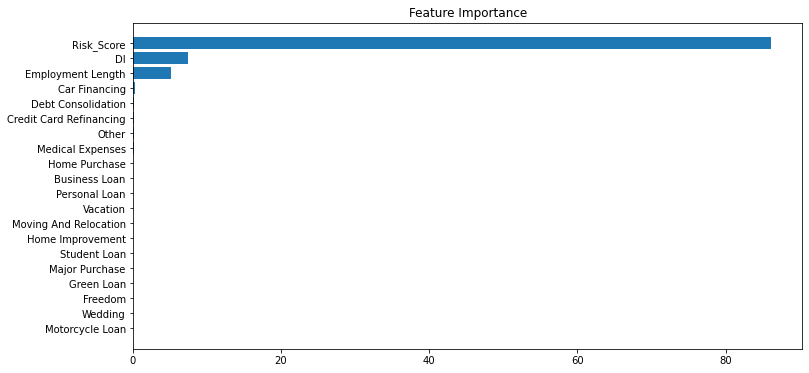

In [16]:
import matplotlib.pyplot as plt

feature_importance = cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance');

In [17]:
import shap

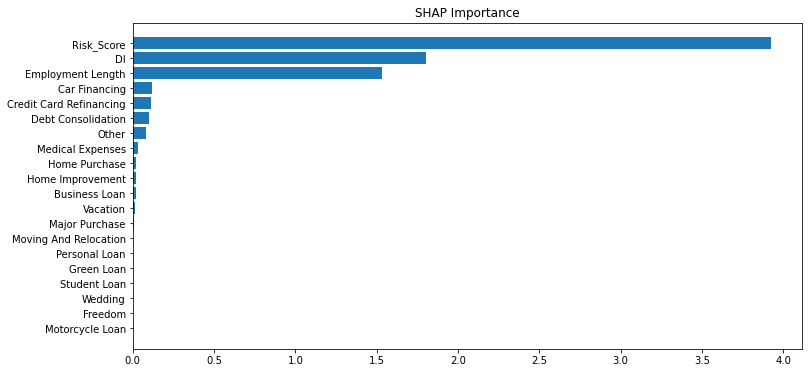

In [18]:
explainer = shap.Explainer(cb)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance');

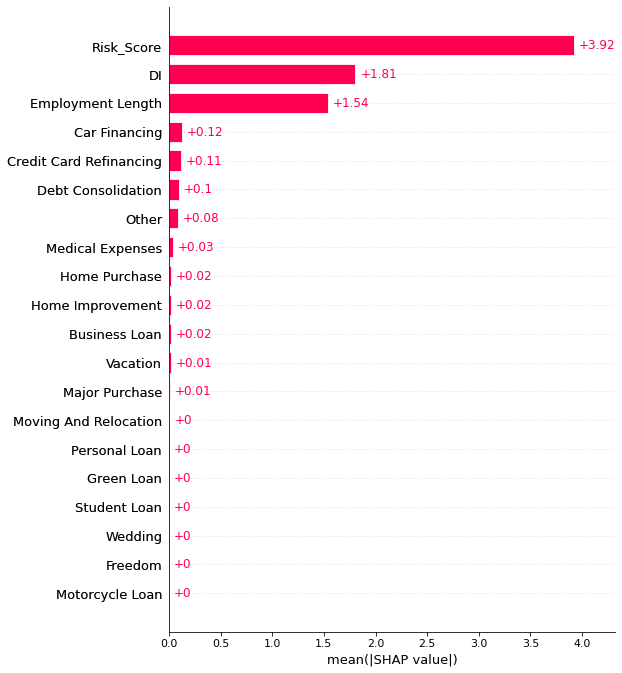

In [19]:
shap.plots.bar(shap_values, max_display=X_test.shape[0])

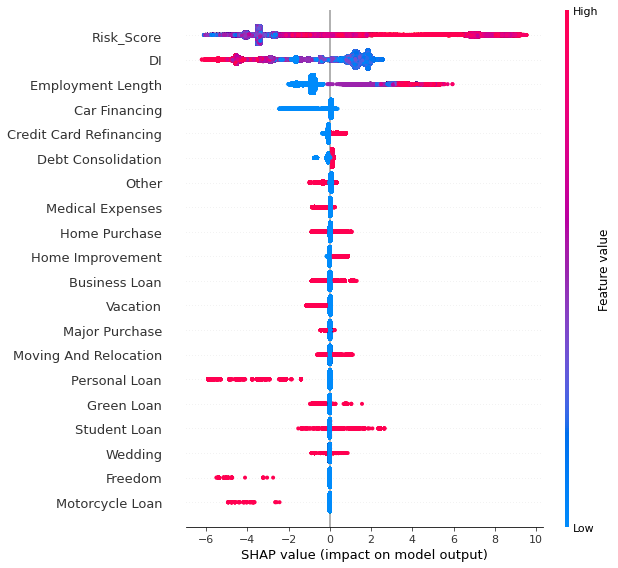

In [20]:
shap.summary_plot(shap_values, max_display=X_test.shape[0])